In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data/cafe_sales_edited_matan_nafshi.csv", sep=";")
df.head(10)

,trans_id,item,quantity,price_per_unit,total_spent,payment_methods,location,trans_date
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3,12,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5,10,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4,20,Credit Card,Unknown,2023-03-31
6,TXN_4433211,Unknown,3,3,9,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4,16,Cash,Unknown,2023-10-28
8,TXN_4717867,Unknown,5,3,15,Unknown,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4,20,Unknown,In-store,2023-12-31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trans_id         9006 non-null   object
 1   item             9006 non-null   object
 2   quantity         9006 non-null   int64 
 3   price_per_unit   9006 non-null   int64 
 4   total_spent      9006 non-null   int64 
 5   payment_methods  9006 non-null   object
 6   location         9006 non-null   object
 7   trans_date       8596 non-null   object
dtypes: int64(3), object(5)
memory usage: 563.0+ KB


In [7]:
df.describe()

,quantity,price_per_unit,total_spent
count,9006.000000,9006.000000,9006.000000
mean,3.023540,3.011326,9.116034
std,1.418644,1.218989,5.915542
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [8]:
#Ensuring values are in the correct format:
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['price_per_unit'] = pd.to_numeric(df['price_per_unit'], errors='coerce')
df['total_spent'] = df['quantity'] * df['price_per_unit']

In [9]:
#Remove unknown or error items
df = df[df['item'].isin(['Unknown', 'ERROR']) == False]

In [10]:
#Aggregainge total revenue by item
item_revenue = df.groupby('item', as_index=False)['total_spent'].sum().sort_values(by='total_spent', ascending=False)

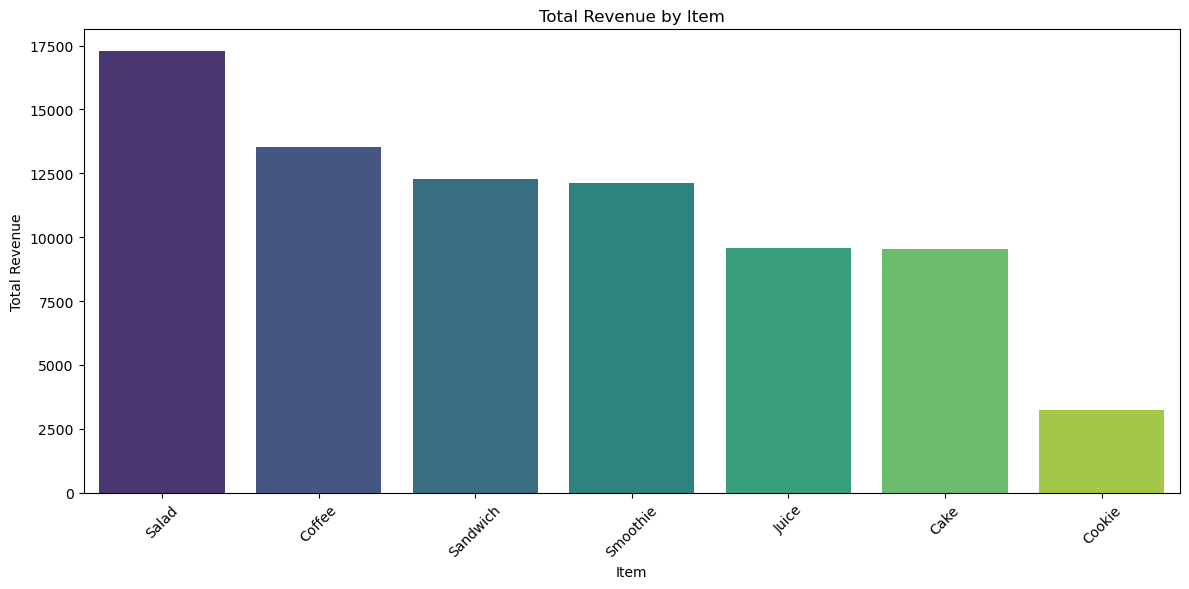

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=item_revenue, x='item', y='total_spent', palette='viridis')
plt.title('Total Revenue by Item')
plt.xlabel('Item')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Matan Nafshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Matan Nafshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


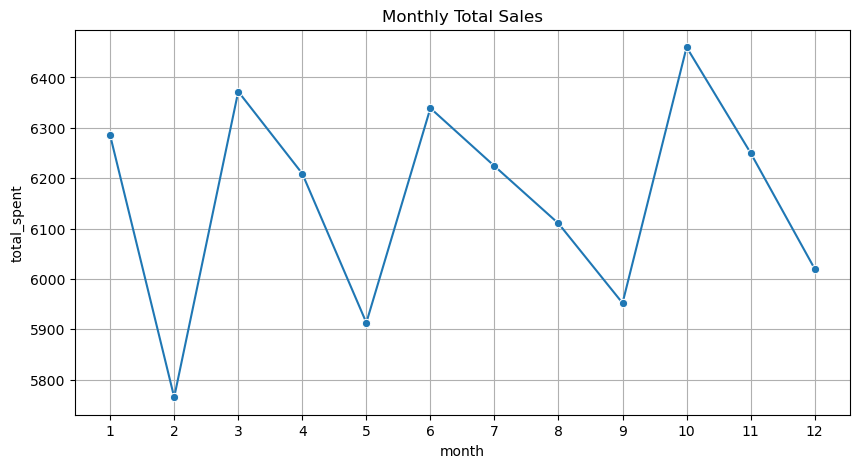

In [12]:
df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')
df['month'] = df['trans_date'].dt.month

monthly_sales = df.groupby('month', as_index=False)['total_spent'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='month', y='total_spent', marker='o')
plt.title('Monthly Total Sales')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

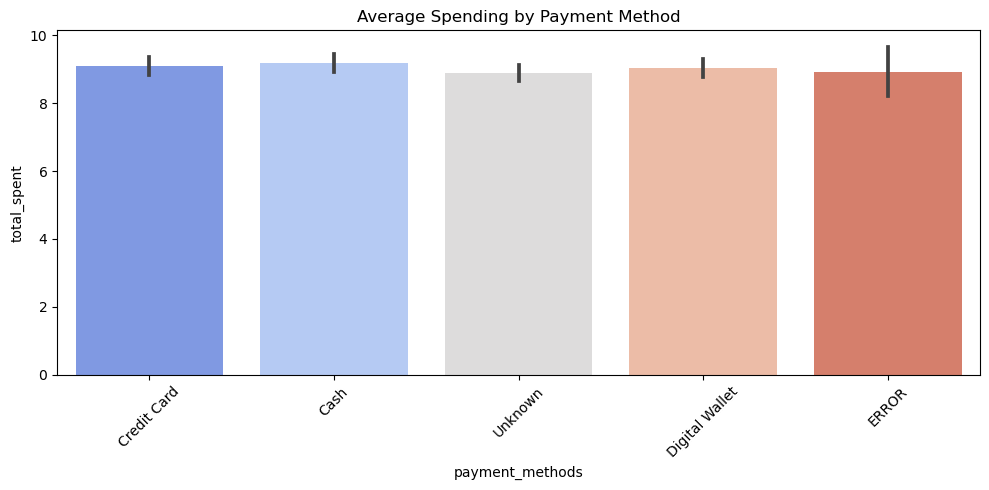

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='payment_methods', y='total_spent', estimator='mean', palette='coolwarm')
plt.title('Average Spending by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

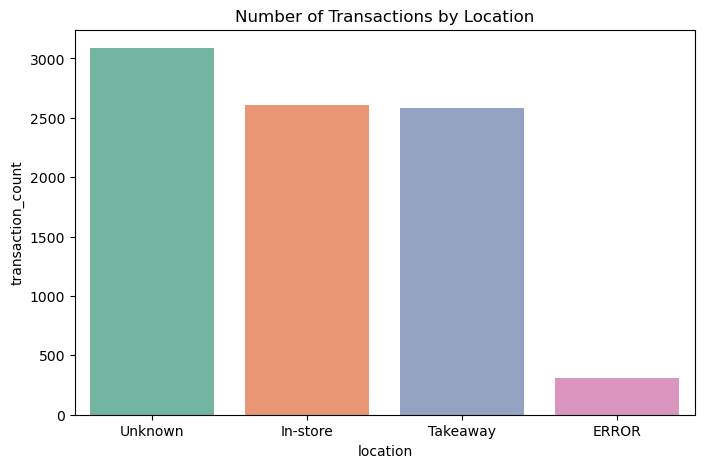

In [14]:
location_counts = df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'transaction_count']

plt.figure(figsize=(8,5))
sns.barplot(data=location_counts, x='location', y='transaction_count', palette='Set2')
plt.title('Number of Transactions by Location')
plt.show()

C:\Users\Matan Nafshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


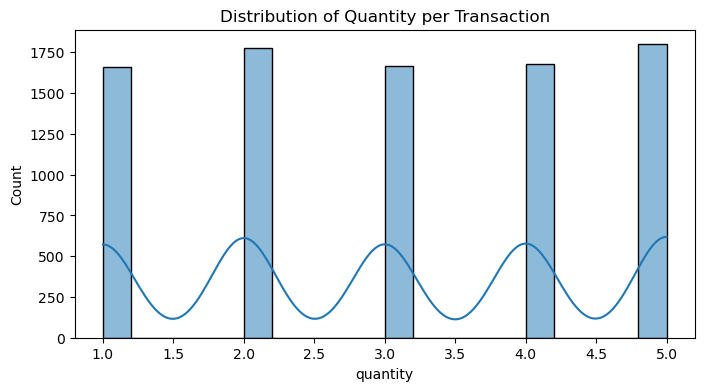

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity per Transaction')
plt.show()

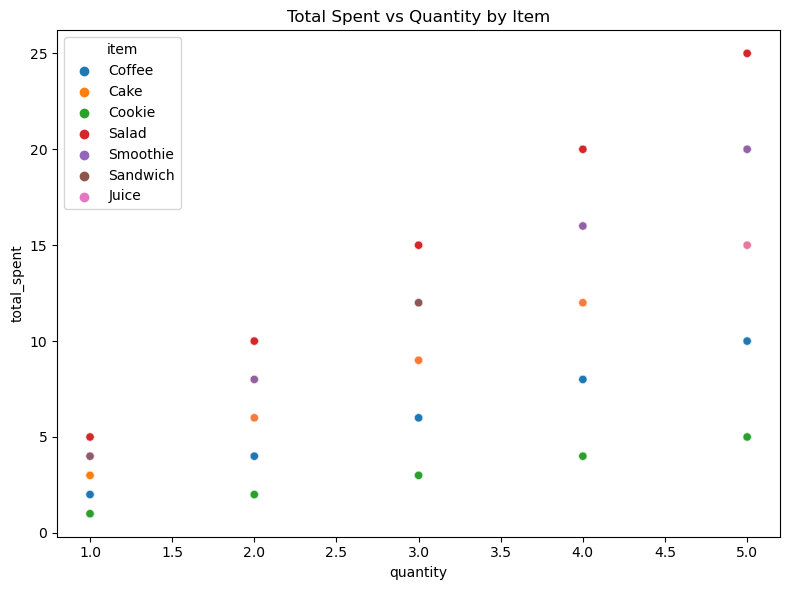

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='quantity', y='total_spent', hue='item', alpha=0.7)
plt.title('Total Spent vs Quantity by Item')
plt.tight_layout()
plt.show()

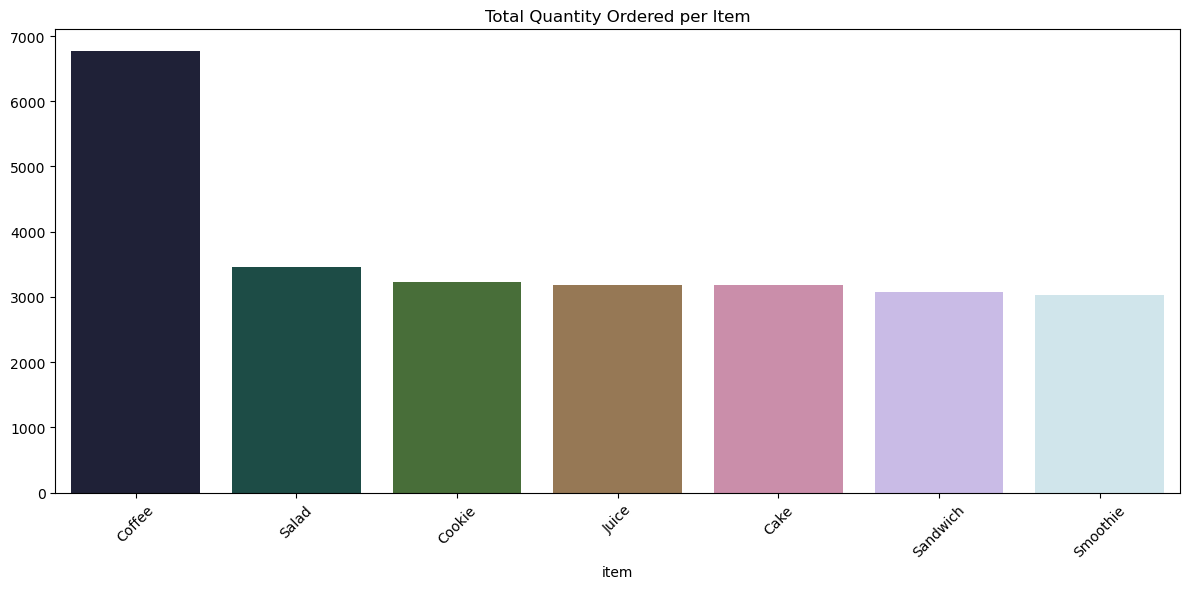

In [17]:
item_quantity = df[df['item'].isin(['Unknown', 'ERROR']) == False].groupby('item')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=item_quantity.index, y=item_quantity.values, palette='cubehelix')
plt.title('Total Quantity Ordered per Item')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


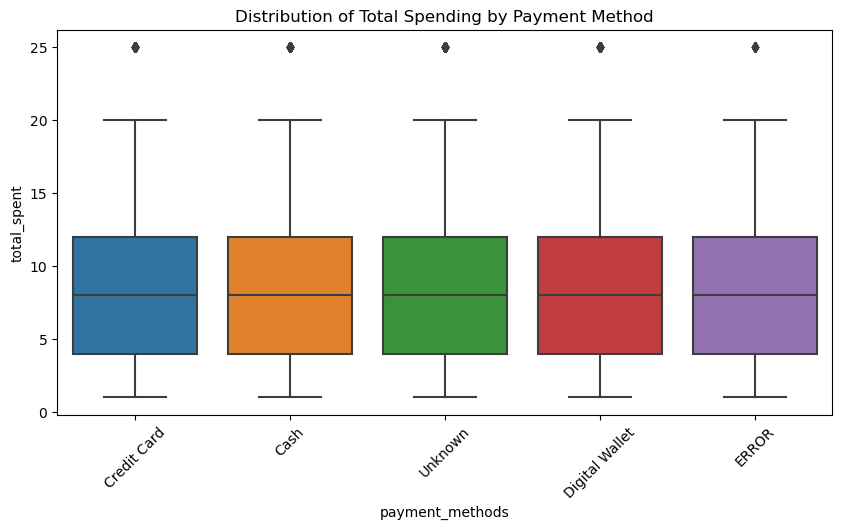

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='payment_methods', y='total_spent')
plt.title('Distribution of Total Spending by Payment Method')
plt.xticks(rotation=45)
plt.show()